In [360]:
import numpy as np
from scipy import interpolate, optimize
import matplotlib.pyplot as plt
from numba import njit

In [361]:
@njit
def get_mid_point(arr: np.ndarray):
    res = np.empty(len(arr)-1)

    for i in range(len(arr)-1):
        res[i] = arr[i] + (arr[i+1] - arr[i])/2    
    
    return res

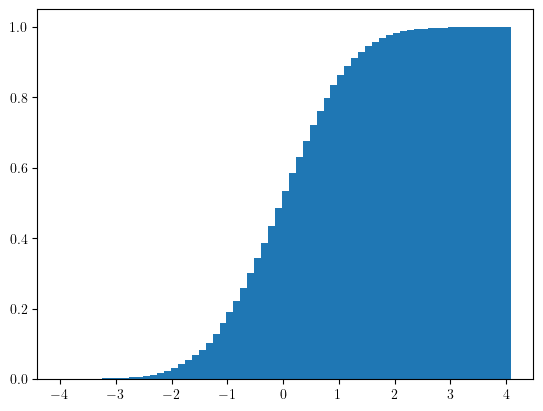

In [362]:
data = np.random.normal(0, 1, 10_000)

n, bins, patches = plt.hist(data, bins="auto",density=True, cumulative=True, histtype="stepfilled")

plt.show()

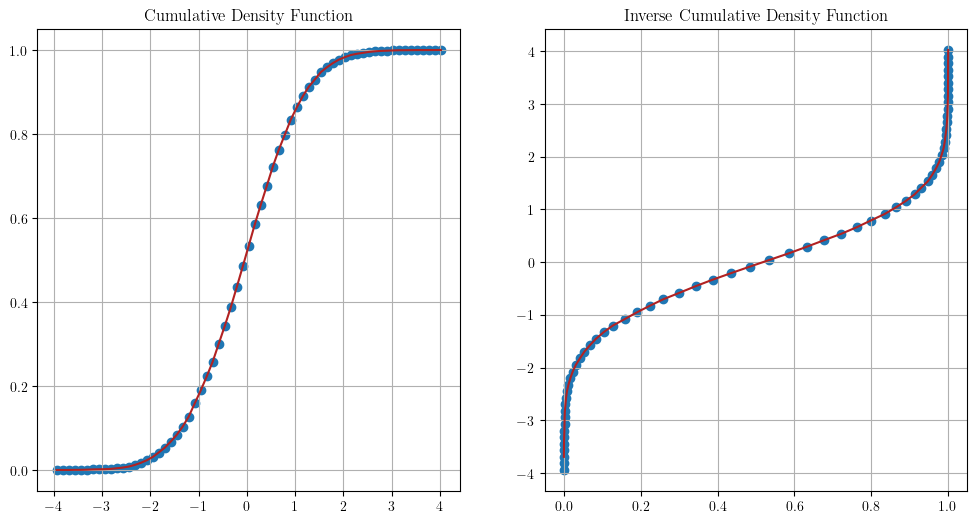

In [363]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

bins = get_mid_point(bins)

cdf = interpolate.interp1d(bins, n)
inverse_cdf = interpolate.interp1d(n, bins)

ax[0].scatter(bins, n)
ax[0].plot(bins, cdf(bins), color="firebrick")
ax[0].set_title("Cumulative Density Function")
ax[0].grid()

ax[1].scatter(n, bins)
ax[1].plot(n, inverse_cdf(n), color="firebrick")
ax[1].set_title("Inverse Cumulative Density Function")
ax[1].grid()

u = np.random.uniform(0.001, 0.999, 100)
#ax[1].plot(u, inverse_cdf(u))

plt.show()

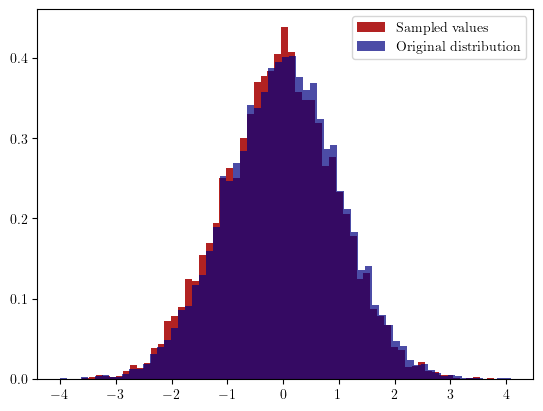

In [364]:
e = 1e-4
u = np.random.uniform(e, 1-e, 10_000)
sample = inverse_cdf(u)

plt.hist(sample, bins="auto", density=True, color="firebrick", label="Sampled values")
plt.hist(data, bins="auto", density=True, color="navy", alpha=0.7, label="Original distribution")

plt.legend()

plt.show()